# PROMs: Patient reported outcome measures

2023-04-24

David Parker




## Background

Patient reported outcome measures (PROMs) are a way of measuring the impact of a disease on a patient's life. Questionnaires are filled in by the patients before and after a treatment. The data can then be used to measure the effectiveness of the treatment.


## Data

The publicly available PROMs data comes from the national health service (NHS) in the UK. The PROMs programme covers four common elective surgical procedures: 
- groin hernia operations
- hip replacements
- knee replacements
- varicose vein operations.

and is available from [here](https://digital.nhs.uk/data-and-information/publications/statistical/patient-reported-outcome-measures-proms).

Explanation of the attributes can be found [here](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/patient-reported-outcome-measures-proms#guidance).



### Oxford Hip Scores (OHS) and Oxford Knee Scores (OKS)
The Oxford hip and knee scores are joint-specific outcome measure tools designed to
assess symptoms and function in patients undergoing joint replacement surgery.

The scores comprise of twelve multiple choice questions relating to the patient’s experience
of pain, ease of joint movement and ease of undertaking normal domestic activities such as
walking or climbing stairs.

Each of the 12 questions on the Oxford Hip Score and Oxford Knee Score are scored in the
same way with the score decreasing as the reported symptoms increase, i.e. become worse.
All questions are laid out similarly with response categories denoting least (or no) symptoms
scoring four and those representing greatest severity scoring zero.

The individual scores are then added together to provide a single score with 0 indicating the
worst possible and 48 indicating the highest possible score.




## Research questions

- Condition over time?
  - Are clear & enough scores available for checking on the conditions of the patients?
- What are the key questions to the patient to find status of patient?
- How might PROMS help physicians/practitioners make better diagnoses in the future?

# EDA

## Knee and Hip replacements

I've chosen to look at the knee and hip replacements data because it has the clearest to link the actual questions and meaning of the values to the data. I'll focus on the Oxford Knee Score (OKS) and Oxford Hip Score (OHS).

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

### Read in the data

In [11]:
hip_columns: list[str] = [
    "hip_replacement_id",
    "hip_replacement_pre_op_q_pain",
    "hip_replacement_pre_op_q_sudden_pain",
    "hip_replacement_pre_op_q_night_pain",
    "hip_replacement_pre_op_q_washing",
    "hip_replacement_pre_op_q_transport",
    "hip_replacement_pre_op_q_dressing",
    "hip_replacement_pre_op_q_shopping",
    "hip_replacement_pre_op_q_walking",
    "hip_replacement_pre_op_q_limping",
    "hip_replacement_pre_op_q_stairs",
    "hip_replacement_pre_op_q_standing",
    "hip_replacement_pre_op_q_work",
    "hip_replacement_pre_op_q_score",
    "hip_replacement_post_op_q_pain",
    "hip_replacement_post_op_q_sudden_pain",
    "hip_replacement_post_op_q_night_pain",
    "hip_replacement_post_op_q_washing",
    "hip_replacement_post_op_q_transport",
    "hip_replacement_post_op_q_dressing",
    "hip_replacement_post_op_q_shopping",
    "hip_replacement_post_op_q_walking",
    "hip_replacement_post_op_q_limping",
    "hip_replacement_post_op_q_stairs",
    "hip_replacement_post_op_q_standing",
    "hip_replacement_post_op_q_work",
    "hip_replacement_post_op_q_score"
]

knee_columns: list[str] = [
    "knee_replacement_id",
    "knee_replacement_pre_op_q_pain",
    "knee_replacement_pre_op_q_night_pain",
    "knee_replacement_pre_op_q_washing",
    "knee_replacement_pre_op_q_transport",
    "knee_replacement_pre_op_q_walking",
    "knee_replacement_pre_op_q_standing",
    "knee_replacement_pre_op_q_limping",
    "knee_replacement_pre_op_q_kneeling",
    "knee_replacement_pre_op_q_work",
    "knee_replacement_pre_op_q_confidence",
    "knee_replacement_pre_op_q_shopping",
    "knee_replacement_pre_op_q_stairs",
    "knee_replacement_pre_op_q_score",
    "knee_replacement_post_op_q_pain",
    "knee_replacement_post_op_q_night_pain",
    "knee_replacement_post_op_q_washing",
    "knee_replacement_post_op_q_transport",
    "knee_replacement_post_op_q_walking",
    "knee_replacement_post_op_q_standing",
    "knee_replacement_post_op_q_limping",
    "knee_replacement_post_op_q_kneeling",
    "knee_replacement_post_op_q_work",
    "knee_replacement_post_op_q_confidence",
    "knee_replacement_post_op_q_shopping",
    "knee_replacement_post_op_q_stairs",
    "knee_replacement_post_op_q_score"
]

common_columns: list[str] = [
    "procedure",
    "year"
]

questions: dict[str, list[str]] = {
    "hip_pain":["hip_replacement_post_op_q_pain", "hip_replacement_pre_op_q_pain"],
    "hip_sudden_pain":["hip_replacement_post_op_q_sudden_pain", "hip_replacement_pre_op_q_sudden_pain"],
    "hip_night_pain":["hip_replacement_post_op_q_night_pain", "hip_replacement_pre_op_q_night_pain"],
    "hip_washing":["hip_replacement_post_op_q_washing", "hip_replacement_pre_op_q_washing"],
    "hip_transport":["hip_replacement_post_op_q_transport", "hip_replacement_pre_op_q_transport"],
    "hip_dressing":["hip_replacement_post_op_q_dressing", "hip_replacement_pre_op_q_dressing"],
    "hip_shopping":["hip_replacement_post_op_q_shopping", "hip_replacement_pre_op_q_shopping"],
    "hip_walking":["hip_replacement_post_op_q_walking", "hip_replacement_pre_op_q_walking"],
    "hip_limping":["hip_replacement_post_op_q_limping", "hip_replacement_pre_op_q_limping"],
    "hip_stairs":["hip_replacement_post_op_q_stairs", "hip_replacement_pre_op_q_stairs"],
    "hip_standing":["hip_replacement_post_op_q_standing", "hip_replacement_pre_op_q_standing"],
    "hip_work":["hip_replacement_post_op_q_work", "hip_replacement_pre_op_q_work"],
    "hip_score":["hip_replacement_post_op_q_score", "hip_replacement_pre_op_q_score"],
    "knee_pain": ["knee_replacement_post_op_q_pain", "knee_replacement_pre_op_q_pain"],
    "knee_night_pain": ["knee_replacement_post_op_q_night_pain", "knee_replacement_pre_op_q_night_pain"],
    "knee_washing": ["knee_replacement_post_op_q_washing", "knee_replacement_pre_op_q_washing"],
    "knee_transport": ["knee_replacement_post_op_q_transport", "knee_replacement_pre_op_q_transport"],
    "knee_walking": ["knee_replacement_post_op_q_walking", "knee_replacement_pre_op_q_walking"],
    "knee_standing": ["knee_replacement_post_op_q_standing", "knee_replacement_pre_op_q_standing"],
    "knee_limping": ["knee_replacement_post_op_q_limping", "knee_replacement_pre_op_q_limping"],
    "knee_kneeling": ["knee_replacement_post_op_q_kneeling", "knee_replacement_pre_op_q_kneeling"],
    "knee_work": ["knee_replacement_post_op_q_work", "knee_replacement_pre_op_q_work"],
    "knee_confidence": ["knee_replacement_post_op_q_confidence", "knee_replacement_pre_op_q_confidence"],
    "knee_shopping": ["knee_replacement_post_op_q_shopping", "knee_replacement_pre_op_q_shopping"],
    "knee_stairs": ["knee_replacement_post_op_q_stairs", "knee_replacement_pre_op_q_stairs"],
    "knee_score": ["knee_replacement_post_op_q_score", "knee_replacement_pre_op_q_score"]
}



In [12]:
hip_data: pd.DataFrame = pd.read_csv("hip_replacement.csv", usecols=common_columns + hip_columns)
knee_data: pd.DataFrame = pd.read_csv("knee_replacement.csv", usecols=common_columns + knee_columns)

hip_data['patient_id'] = 'hip_' + hip_data['hip_replacement_id'].astype(str)
knee_data['patient_id'] = 'knee_' + knee_data['knee_replacement_id'].astype(str)

hip_data = hip_data.drop(columns=['hip_replacement_id'])
knee_data = knee_data.drop(columns=['knee_replacement_id'])

data = pd.concat([hip_data, knee_data])

In [13]:
df = (data.melt(id_vars=['procedure', 'year', 'patient_id'],
                        var_name='question',
                        value_name='score'
                        )
    .set_index('patient_id')
    .dropna()
)

# Sanity check to quickly see if there are post and pre op for each question
assert(df.nunique()["question"] % 2 == 0)

print(f"We have {df.index.nunique()} patients and {df.nunique()['question']/2} different questions which are answered twice (pre and post op).")
print(f"We have {df.shape[0]} answers, from {df.nunique()['procedure']} different procedures and {df.nunique()['year']} different years.")

df.head()


We have 1053014 patients and 26.0 different questions which are answered twice (pre and post op).
We have 27351477 answers, from 2 different procedures and 7 different years.


,procedure,year,question,score
patient_id,,,,
hip_0,Hip Replacement,2015/16,hip_replacement_pre_op_q_pain,1.0
hip_1,Hip Replacement,2015/16,hip_replacement_pre_op_q_pain,0.0
hip_2,Hip Replacement,2015/16,hip_replacement_pre_op_q_pain,0.0
hip_3,Hip Replacement,2015/16,hip_replacement_pre_op_q_pain,0.0
hip_4,Hip Replacement,2015/16,hip_replacement_pre_op_q_pain,1.0


In [16]:
temp = (df.reset_index()
        .groupby(['procedure', 'year'])
        .agg(num_patients=('patient_id', 'nunique'))
)

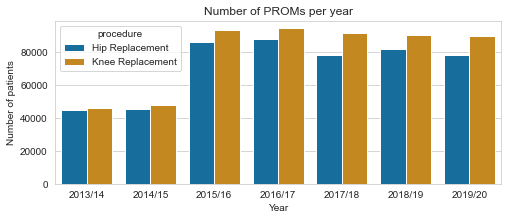

In [17]:
plt.figure(figsize=(8, 3))

sns.barplot(data=temp.reset_index(), x='year', y='num_patients', hue='procedure')

plt.title('Number of PROMs per year')
plt.xlabel('Year')
plt.ylabel('Number of patients')

In [18]:
(df.reset_index()
    .groupby(['procedure'])
    .agg(num_patients=('patient_id', 'nunique'))
    .groupby('procedure')['num_patients']
    .transform('sum')
)

procedure
Hip Replacement     501227
Knee Replacement    551787
Name: num_patients, dtype: int64

### Missing values

Missing values are noted with a "9" 

In [19]:
score_questions: list[str] = ["hip_replacement_pre_op_q_score",
                              "hip_replacement_post_op_q_score",
                              "knee_replacement_pre_op_q_score",
                              "knee_replacement_post_op_q_score"]
(df[(~df["question"].isin(score_questions))
    & (df["score"] == 9.0)
   ]
    .drop("year", axis=1)
    .groupby(["procedure", "question"])
    .count()
    .sort_values(by="score", ascending=False)
    .rename(columns={"score":"Number of missing entries"})
)
# TODO add a percentage calculation

Number of missing entries
procedure        question                                                        
Knee Replacement knee_replacement_pre_op_q_standing                          5681
                 knee_replacement_pre_op_q_walking                           5661
                 knee_replacement_pre_op_q_limping                           5556
                 knee_replacement_pre_op_q_kneeling                          5478
                 knee_replacement_pre_op_q_transport                         5347
                 knee_replacement_pre_op_q_work                              5328
                 knee_replacement_pre_op_q_confidence                        5292
                 knee_replacement_pre_op_q_stairs                            5263
                 knee_replacement_pre_op_q_shopping                          5263
                 knee_replacement_pre_op_q_night_pain                        5145
Hip Replacement  hip_replacement_pre_op_q_walking                            4744
Knee Replacement knee_replacement_post_op_q_walking                          4737
Hip Replacement  hip_replacement_pre_op_q_stairs                             4643
                 hip_replacement_pre_op_q_shopping                           4557
                 hip_replacement_pre_op_q_dressing                           4518
                 hip_replacement_pre_op_q_standing                           4514
                 hip_replacement_post_op_q_walking                           4497
                 hip_replacement_pre_op_q_work                               4489
                 hip_replacement_pre_op_q_transport                          4482
                 hip_replacement_pre_op_q_limping                            4423
                 hip_replacement_pre_op_q_sudden_pain                        4404
                 hip_replacement_pre_op_q_night_pain                         4274
Knee Replacement knee_replacement_post_op_q_pain                             4178
                 knee_replacement_post_op_q_limping                          4138
                 knee_replacement_post_op_q_transport                        4121
                 knee_replacement_post_op_q_kneeling                         4064
                 knee_replacement_post_op_q_washing                          3992
Hip Replacement  hip_replacement_post_op_q_limping                           3942
Knee Replacement knee_replacement_post_op_q_work                             3827
                 knee_replacement_post_op_q_shopping                         3821
Hip Replacement  hip_replacement_post_op_q_work                              3809
Knee Replacement knee_replacement_post_op_q_standing                         3786
Hip Replacement  hip_replacement_post_op_q_stairs                            3676
Knee Replacement knee_replacement_post_op_q_stairs                           3646
Hip Replacement  hip_replacement_post_op_q_standing                          3603
Knee Replacement knee_replacement_post_op_q_confidence                       3462
Hip Replacement  hip_replacement_post_op_q_shopping                          3438
Knee Replacement knee_replacement_post_op_q_night_pain                       3222
Hip Replacement  hip_replacement_post_op_q_night_pain                        3205
                 hip_replacement_post_op_q_sudden_pain                       3133
                 hip_replacement_post_op_q_dressing                          3126
                 hip_replacement_post_op_q_transport                         3112
                 hip_replacement_post_op_q_pain                              1389
                 hip_replacement_post_op_q_washing                           1283
Knee Replacement knee_replacement_pre_op_q_pain                               718
Hip Replacement  hip_replacement_pre_op_q_pain                                669
                 hip_replacement_pre_op_q_washing                             484
Knee Replacement knee_replacement_pre_

In [20]:
(df[(~df["question"].isin(score_questions))
    & (df["score"] != 9.0)
   ]
    .drop("year", axis=1)
    .groupby(["procedure", "question"])
    .count()
    .sort_values(by="score", ascending=False)
    .rename(columns={"score":"Number of valid entries"})
)

Number of valid entries
procedure        question                                                      
Knee Replacement knee_replacement_pre_op_q_washing                       551352
                 knee_replacement_pre_op_q_pain                          551069
                 knee_replacement_post_op_q_night_pain                   548565
                 knee_replacement_post_op_q_confidence                   548325
                 knee_replacement_post_op_q_stairs                       548141
                 knee_replacement_post_op_q_standing                     548001
                 knee_replacement_post_op_q_shopping                     547966
                 knee_replacement_post_op_q_work                         547960
                 knee_replacement_post_op_q_washing                      547795
                 knee_replacement_post_op_q_kneeling                     547723
                 knee_replacement_post_op_q_transport                    547666
                 knee_replacement_post_op_q_limping                      547649
                 knee_replacement_post_op_q_pain                         547609
                 knee_replacement_post_op_q_walking                      547050
                 knee_replacement_pre_op_q_night_pain                    546642
                 knee_replacement_pre_op_q_shopping                      546524
                 knee_replacement_pre_op_q_stairs                        546524
                 knee_replacement_pre_op_q_confidence                    546495
                 knee_replacement_pre_op_q_work                          546459
                 knee_replacement_pre_op_q_transport                     546440
                 knee_replacement_pre_op_q_kneeling                      546309
                 knee_replacement_pre_op_q_limping                       546231
                 knee_replacement_pre_op_q_walking                       546126
                 knee_replacement_pre_op_q_standing                      546106
Hip Replacement  hip_replacement_pre_op_q_washing                        500743
                 hip_replacement_pre_op_q_pain                           500558
                 hip_replacement_post_op_q_washing                       499944
                 hip_replacement_post_op_q_pain                          499838
                 hip_replacement_post_op_q_transport                     498115
                 hip_replacement_post_op_q_dressing                      498101
                 hip_replacement_post_op_q_sudden_pain                   498094
                 hip_replacement_post_op_q_night_pain                    498022
                 hip_replacement_post_op_q_shopping                      497789
                 hip_replacement_post_op_q_standing                      497624
                 hip_replacement_post_op_q_stairs                        497551
                 hip_replacement_post_op_q_work                          497418
                 hip_replacement_post_op_q_limping                       497285
                 hip_replacement_pre_op_q_night_pain                     496953
                 hip_replacement_pre_op_q_sudden_pain                    496823
                 hip_replacement_pre_op_q_limping                        496804
                 hip_replacement_pre_op_q_transport                      496745
                 hip_replacement_pre_op_q_work                           496738
                 hip_replacement_post_op_q_walking                       496730
                 hip_replacement_pre_op_q_standing                       496713
                 hip_replacement_pre_op_q_dressing                       496709
                 hip_replacement_pre_op_q_shopping                       496670
                 hip_replacement_pre_op_q_stairs                         496584
                 hip_replacement_pre_op_q_walking                        496483

Remove the missing values

In [21]:
n_rows = df.shape[0]
df = df[~((~df["question"].isin(score_questions)) & (df["score"] == 9.0))]
print(f"Removed {n_rows - df.shape[0]} rows containing '9'")


Removed 186575 rows containing '9'


Sanity check to make sure that the total score questions with a value of 9 were not removed:

In [22]:
assert(df[df["question"].isin(score_questions) & (df["score"] == 9.0)].shape[0] != 0)

This assumes that there is at least one total score with a value of 9, which does not have to be true.

### Looking at the total scores

In [23]:
(df[df["question"].isin(score_questions)]
    .groupby(["procedure", "question"])
    .describe()
)

score             \
                                                      count       mean   
procedure        question                                                
Hip Replacement  hip_replacement_post_op_q_score   495348.0  39.611219   
                 hip_replacement_pre_op_q_score    495682.0  17.918020   
Knee Replacement knee_replacement_post_op_q_score  542768.0  35.751328   
                 knee_replacement_pre_op_q_score   545343.0  19.030557   

                                                                              \
                                                        std  min   25%   50%   
procedure        question                                                      
Hip Replacement  hip_replacement_post_op_q_score   8.773253  0.0  36.0  43.0   
                 hip_replacement_pre_op_q_score    8.325122  0.0  12.0  17.0   
Knee Replacement knee_replacement_post_op_q_score  9.553943  0.0  30.0  38.0   
                 knee_replacement_pre_op_q_score   7.761971  0.0  13.0  19.0   

                                                               
                                                    75%   max  
procedure        question                                      
Hip Replacement  hip_replacement_post_op_q_score   46.0  48.0  
                 hip_replacement_pre_op_q_score    23.0  48.0  
Knee Replacement knee_replacement_post_op_q_score  43.0  48.0  
                 knee_replacement_pre_op_q_score   24.0  48.0

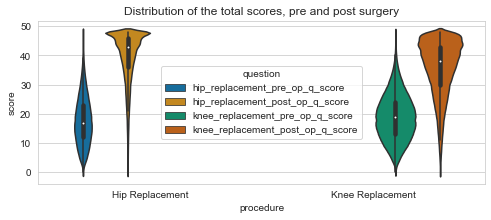

In [25]:
temp = df[df["question"].isin(score_questions)][["procedure", "question", "score"]]

plt.figure(figsize=(8, 3))
ax = sns.violinplot(data=temp,
               x = "procedure",
               y="score",
               hue="question"
)
plt.title("Distribution of the total scores, pre and post surgery")
sns.move_legend(ax, "center")

As expected, the surgeries seem to improve the well being of the patients.

### Pre and post surgery

In [26]:
df_diff = data.set_index("patient_id").drop(columns=["procedure", "year"])

# Remove the missing values by replacing them with NaN, except for the score questions
df_diff = df_diff.replace({col: {9.0: pd.NA} for col in df_diff.columns if col not in score_questions})
for question in questions:
    # Post op - Pre op. Positive values mean improvement, negative values mean worsening
    df_diff[question] = df_diff[questions[question][0]] - df_diff[questions[question][1]]

df_diff = df_diff.drop(columns=[col for col in df_diff.columns if col not in questions.keys()])
df_diff = (df_diff
    .reset_index()
    .melt(id_vars="patient_id",
          var_name="question",
          value_name="score_diff"
    )
    .dropna()
    .set_index("patient_id")
)

df_diff["score_diff"] = df_diff["score_diff"].astype(float)


In [27]:
df_diff

,question,score_diff
patient_id,,
hip_0,hip_pain,2.0
hip_1,hip_pain,4.0
hip_2,hip_pain,4.0
hip_3,hip_pain,3.0
hip_4,hip_pain,2.0
...,...,...
knee_551782,knee_score,6.0
knee_551783,knee_score,13.0
knee_551784,knee_score,19.0


In [28]:
(df_diff
    .groupby("question")
    .describe()
    .sort_values(by=("score_diff", "mean"), ascending=False)
)

score_diff                                                    
                     count       mean        std   min   25%   50%   75%   max
question                                                                      
hip_score         489990.0  21.666667  10.218333 -40.0  15.0  22.0  29.0  48.0
knee_score        536542.0  16.702068   9.859733 -39.0  10.0  17.0  24.0  47.0
hip_limping       492962.0   2.466904   1.395692  -4.0   2.0   3.0   4.0   4.0
hip_pain          499191.0   2.383322   1.386162  -4.0   2.0   3.0   3.0   4.0
hip_night_pain    493806.0   2.315843   1.368925  -4.0   1.0   2.0   3.0   4.0
knee_limping      542186.0   2.170008   1.379118  -4.0   1.0   2.0   3.0   4.0
hip_sudden_pain   493758.0   2.095399   1.404642  -4.0   1.0   2.0   3.0   4.0
hip_work          493021.0   2.053231   1.154231  -4.0   1.0   2.0   3.0   4.0
knee_pain         546918.0   2.039719   1.243168  -4.0   1.0   2.0   3.0   4.0
hip_standing      493187.0   1.760253   1.059379  -4.0   1.0   2.0   3.0   4.0
knee_confidence   543110.0   1.634650   1.276028  -4.0   1.0   2.0   3.0   4.0
knee_work         542715.0   1.613477   1.138553  -4.0   1.0   2.0   2.0   4.0
knee_night_pain   543482.0   1.556315   1.437055  -4.0   0.0   2.0   3.0   4.0
hip_walking       492082.0   1.550248   1.342985  -4.0   1.0   2.0   2.0   4.0
hip_transport     493694.0   1.489092   0.987565  -4.0   1.0   2.0   2.0   4.0
hip_dressing      493644.0   1.432062   1.228894  -4.0   1.0   1.0   2.0   4.0
hip_stairs        493004.0   1.422100   1.053365  -4.0   1.0   1.0   2.0   4.0
hip_shopping      493306.0   1.419707   1.299597  -4.0   0.0   1.0   2.0   4.0
knee_standing     542409.0   1.396900   1.072963  -4.0   1.0   1.0   2.0   4.0
knee_shopping     542774.0   1.300353   1.244474  -4.0   0.0   1.0   2.0   4.0
knee_walking      541491.0   1.280932   1.321450  -4.0   0.0   1.0   2.0   4.0
hip_washing       499477.0   1.263285   1.089614  -4.0   0.0   1.0   2.0   4.0
knee_stairs       542961.0   1.221257   1.095557  -4.0   0.0   1.0   2.0   4.0
knee_transport    542378.0   0.975657   1.041747  -4.0   0.0   1.0   2.0   4.0
knee_kneeling     542335.0   0.760095   1.287190  -4.0   0.0   1.0   2.0   4.0
knee_washing      547373.0   0.743630   1.023272  -4.0   0.0   1.0   1.0   4.0

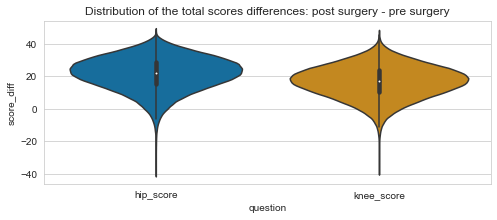

In [29]:
temp = df_diff[df_diff["question"].isin(["hip_score", "knee_score"])]
plt.figure(figsize=(8, 3))
ax = sns.violinplot(data=temp,
               x = "question",
               y="score_diff",
)
plt.title("Distribution of the total scores differences: post surgery - pre surgery")

Larger values indicate better well being. Negative values indicate that the patient's well being has decreased after the surgery.

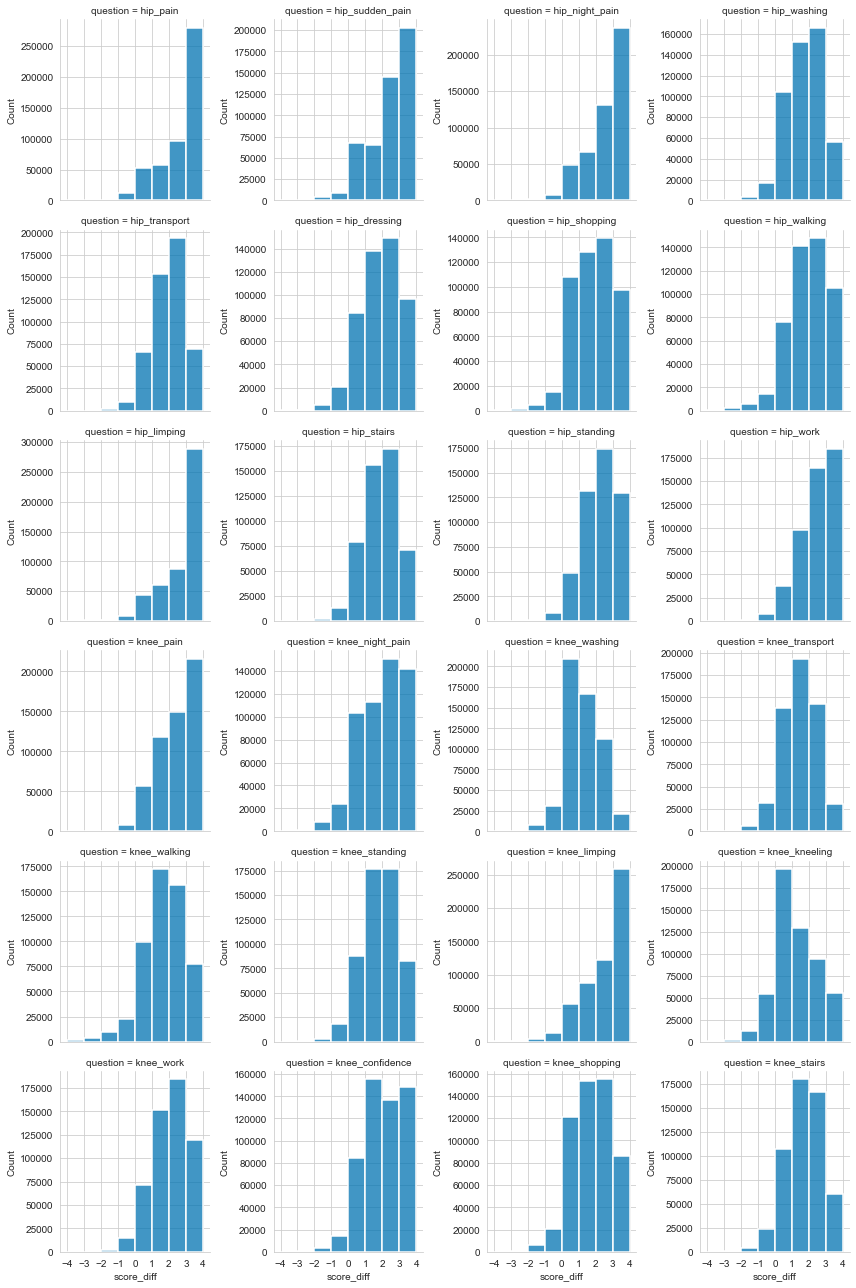

In [30]:
temp = df_diff[~df_diff["question"].isin(["hip_score", "knee_score"])]
g = sns.FacetGrid(temp,
                  col="question",
                  col_wrap=4,
                  sharey=False,
                  sharex=True)
g.set(xticks=np.arange(-4, 5, 1))
g.map(sns.histplot,
      "score_diff",
      bins=np.arange(-4, 5, 1),
      linewidth=1.5
      )

# Disscussion

## Condition over time

The questions in the Oxford PROM questions are designed to measure the patient's well being. Having each patient fill out the questionnaire before and after the surgery should allow for the evaluation of the patient condition over time. The analysis above shows that, on average, the scores increase after the surgery. This, assuming that performing surgery improves the patient's well being, indicates that PROMs can be used to check on the condition of the patients over time.

## Key questions

Only considering hip and knee replacements, one could argue that the most important questions are the ones for with the largest difference between the pre and post surgery scores. The questions with the largest difference are:

In [ ]:
(df_diff[~df_diff["question"].isin(["hip_score", "knee_score"])]
    .groupby("question")
    .describe()
    .sort_values(by=("score_diff", "mean"), ascending=False)
    .head(10)
)

score_diff                                             
                     count      mean       std  min  25%  50%  75%  max
question                                                               
hip_limping       492962.0  2.466904  1.395692 -4.0  2.0  3.0  4.0  4.0
hip_pain          499191.0  2.383322  1.386162 -4.0  2.0  3.0  3.0  4.0
hip_night_pain    493806.0  2.315843  1.368925 -4.0  1.0  2.0  3.0  4.0
knee_limping      542186.0  2.170008  1.379118 -4.0  1.0  2.0  3.0  4.0
hip_sudden_pain   493758.0  2.095399  1.404642 -4.0  1.0  2.0  3.0  4.0
hip_work          493021.0  2.053231  1.154231 -4.0  1.0  2.0  3.0  4.0
knee_pain         546918.0  2.039719  1.243168 -4.0  1.0  2.0  3.0  4.0
hip_standing      493187.0  1.760253  1.059379 -4.0  1.0  2.0  3.0  4.0
knee_confidence   543110.0  1.634650  1.276028 -4.0  1.0  2.0  3.0  4.0
knee_work         542715.0  1.613477  1.138553 -4.0  1.0  2.0  2.0  4.0

These questions are:
- During the past 4 weeks, have you been limping when walking, because of your hip/knee?
- During the past 4 weeks, how would you describe the pain you usually had from your hip/knee?
- During the past 4 weeks, have you been troubled by pain from your hip in bed at night?
- During the past 4 weeks, have you felt that your knee might suddenly 'give way' or let you down?

The common theme here is pain. Another analysis would have do be done on conditions/diseases which do not induce pain to find other types of questions.

## Help physicians/practitioners make better diagnoses

The two conditions that were studied in this report are hip and knee replacements, which are very easy to diagnose. Another analysis would have to be done on conditions/diseases which are more difficult to diagnose to see if PROMs can help physicians/practitioners make better diagnoses in the future.